 **Step 1: Import Required libraries**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


**Step 2: Unzip Dtaset**

In [9]:
import zipfile
import os

# Set file name (adjust if yours is different)
zip_path = "/content/archive.zip"

# Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# List extracted files
os.listdir("/content/")


['.config', 'archive.zip', 'StudentsPerformance.csv', 'sample_data']

**Step 3: Load Dataset**

In [10]:
import pandas as pd

df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Step 3: Explore & Clean the Data**

In [12]:
# Check shape and info
print("Shape:", df.shape)
print("\nData Info:\n")
df.info()

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())


Shape: (1000, 8)

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

Missing Values:

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score               

**Step 4: Data Visualization (Optional but Recommended)**

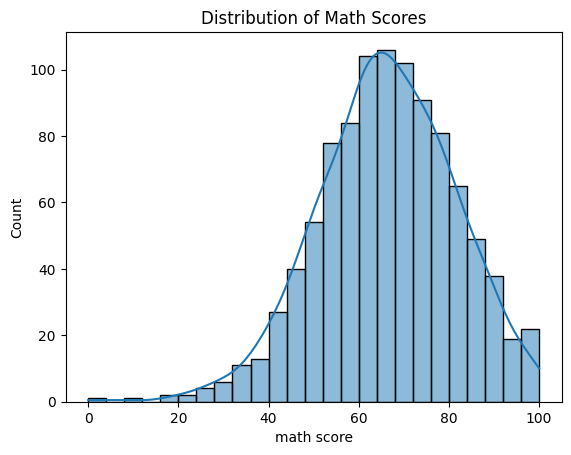

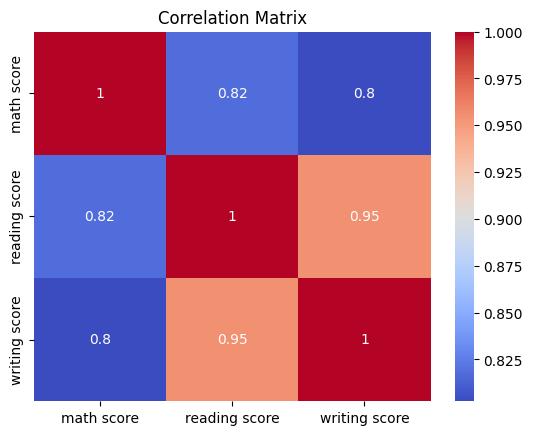

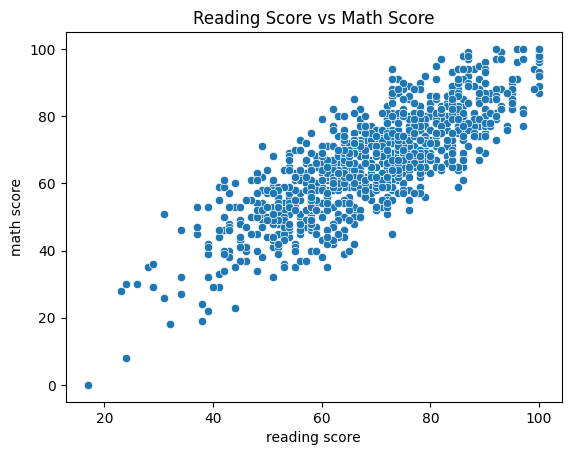

In [13]:
# Distribution of math scores
sns.histplot(df['math score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Scatterplot: Reading vs Math
sns.scatterplot(x='reading score', y='math score', data=df)
plt.title("Reading Score vs Math Score")
plt.show()


**step 5: feature encoding**

In [14]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# View the new columns
df_encoded.head()


,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True


**Step 6: Model Training (Linear Regression)**

In [15]:
# Define features and target
X = df_encoded[['reading score', 'writing score']]
y = df_encoded['math score']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


** Step 7: Evaluate the Model**

In [16]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 77.24297821278955
R-squared Score: 0.6825697127424626


** Step 8: Visualize Predictions**

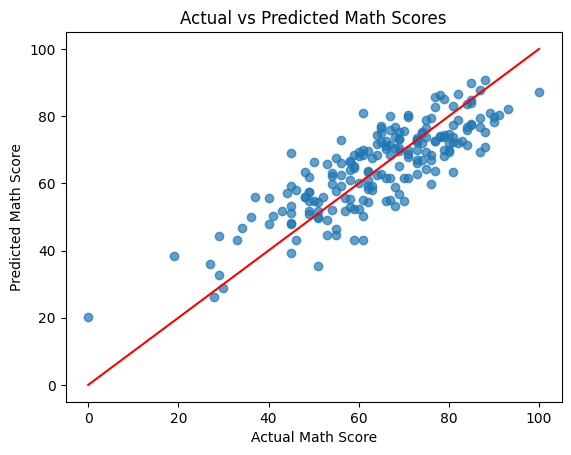

In [17]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')  # 45-degree line
plt.show()
